**MNIST Handwritten Digit Clasification using Deep Learning (Neural Network)**

Dataset info : https://keras.io/api/datasets/mnist/

Documentation : https://docs.google.com/document/d/1zhqaCSyA8JsSSTYTtNCgWPhu-ncBCCUJr1GQBgUoiO0/edit

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2     # Open CV
from google.colab.patches import cv2_imshow  #To shoe the image
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix
from sklearn.model_selection import KFold
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD

**Loading the MNIST data from keras.datasets**

In [54]:
(X_train, Y_train), (X_test, Y_test)=tf.keras.datasets.mnist.load_data(path="mnist.npz")
#Loads the MNIST dataset.
# This is a dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images.

In [55]:
#Normalisation
X_train=X_train/255
X_test=X_test/255

**Understading the data**

In [56]:
X_train.shape

(60000, 28, 28)

In [57]:
Y_train.shape

(60000,)

In [58]:
X_test.shape

(10000, 28, 28)

In [59]:
type(X_train)

numpy.ndarray

In [60]:
X_train[0].shape

(28, 28)

In [61]:
# X_train[0]

In [62]:
Y_train[0]

5

In [63]:
# x_train: uint8 NumPy array of grayscale image data with shapes (60000, 28, 28), containing the training data. Pixel values range from 0 to 255.

# y_train: uint8 NumPy array of digit labels (integers in range 0-9) with shape (60000,) for the training data.

# x_test: uint8 NumPy array of grayscale image data with shapes (10000, 28, 28), containing the test data. Pixel values range from 0 to 255.

# y_test: uint8 NumPy array of digit labels (integers in range 0-9) with shape (10000,) for the test data.

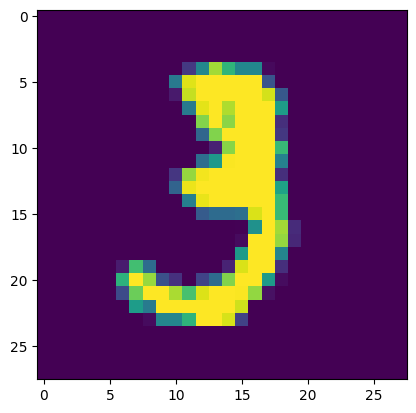

3


In [64]:
# Displeying an image
img=X_train[10]
plt.imshow(img)
plt.show()
print(Y_train[10])

In [65]:
np.unique(Y_train)             #All the unique values in Y_train

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

**Creating a Test model**

In [66]:
# setting up the layers of the Neural  Network

model1 = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='softmax')
])

In [67]:
# compiling the Neural Network

model1.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [68]:
model1.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2973 - accuracy: 0.9145
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1349 - accuracy: 0.9590
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0992 - accuracy: 0.9694
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0805 - accuracy: 0.9754
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0685 - accuracy: 0.9782
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0585 - accuracy: 0.9815
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0500 - accuracy: 0.9830
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0439 - accuracy: 0.9854
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0380 - accuracy: 0.9875
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0

In [69]:
loss, accuracy = model1.evaluate(X_test, Y_test)
print(accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.1052 - accuracy: 0.9742
0.9742000102996826


In [70]:
y_predict=model1.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [71]:
y_predict.shape

(10000, 10)

In [72]:
y_predict[0]

array([4.0116723e-07, 6.6058581e-09, 3.2078503e-07, 3.5402557e-08,
       5.2770224e-14, 1.9608147e-11, 1.4479540e-13, 9.9999905e-01,
       2.4739884e-07, 1.6474241e-08], dtype=float32)

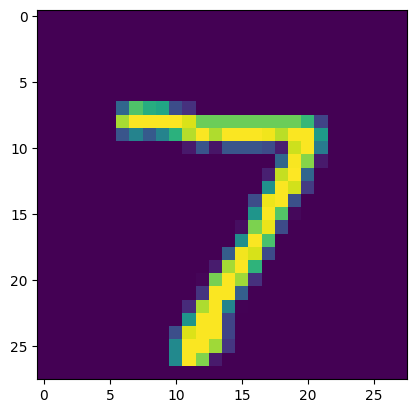

In [73]:
img=X_test[0]
plt.imshow(img)
plt.show()

In [74]:
#Converting the preciction probabilites into class lables

In [75]:
Y_labels=np.argmax(y_predict[0])

In [76]:
Y_labels

7

In [77]:
# converting the prediction probabilities to class label for all test data points
Y_pred_labels = [np.argmax(i) for i in y_predict]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 9, 5, 5, 1, 5, 6, 0, 2, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [78]:
  conf_mat = confusion_matrix(Y_test, Y_pred_labels)

In [79]:
print(conf_mat)

tf.Tensor(
[[ 964    0    0    2    1    2    4    5    2    0]
 [   0 1127    3    1    0    1    2    0    1    0]
 [   5    2 1007    2    4    0    1    7    3    1]
 [   0    0    9  965    2   12    0    7    9    6]
 [   1    0    5    0  959    0    3    2    1   11]
 [   3    2    1    2    1  874    3    2    4    0]
 [   6    3    2    0    7    5  931    0    4    0]
 [   1    6   16    0    0    0    0  996    4    5]
 [   1    0    3    5    4    7    1    3  947    3]
 [   6    2    0    2   11    5    0   10    1  972]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

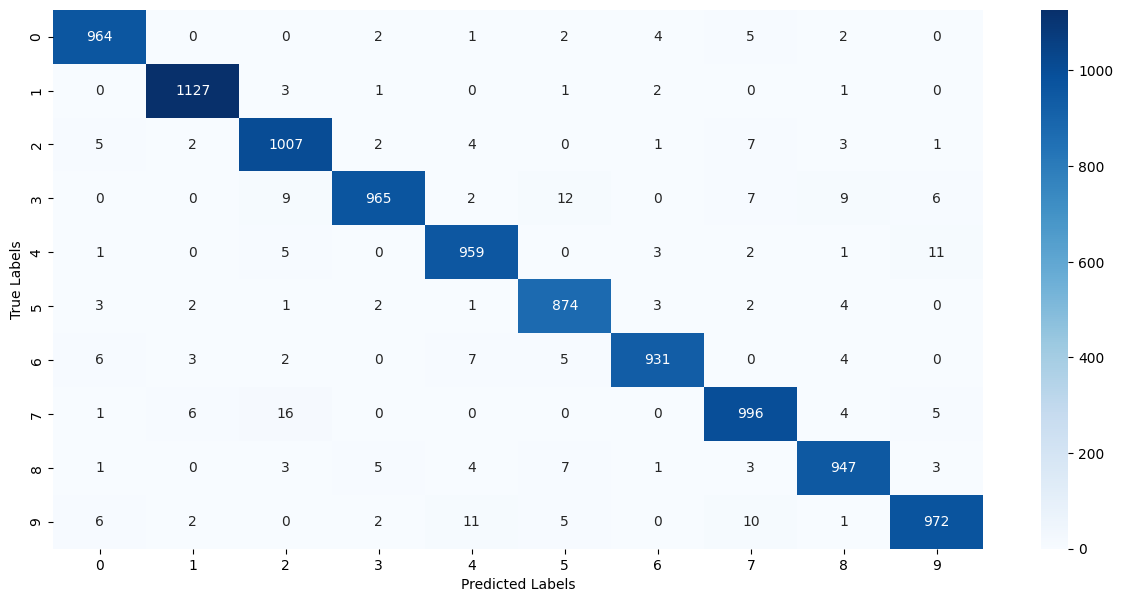

In [80]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

**Creating a Acual model**

In [81]:
X_train= X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test= X_test.reshape((X_test.shape[0], 28, 28, 1))
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [82]:
X_train.shape

(60000, 28, 28, 1)

In [83]:
# model=keras.Sequential([
#     keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28,1)),
#     keras.layers.MaxPooling2D((2, 2)),
#     keras.layers.Flatten(),
#     keras.layers.Dense(100, activation='relu', kernel_initializer='he_uniform'),
#     keras.layers.Dense(10, activation='softmax')
# ])

In [84]:
# opt = SGD(learning_rate=0.01, momentum=0.9)
# loss='categorical_crossentropy'

In [85]:
# model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [86]:
kfold = KFold(5, shuffle=True, random_state=1)   #Splitting into 5

In [87]:
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	opt = SGD(learning_rate=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

In [88]:
scores, histories = list(), list()
for train_ix, test_ix in kfold.split(X_train):
		model = define_model()
		trainX, trainY, testX, testY = X_train[train_ix], Y_train[train_ix], X_train[test_ix], Y_train[test_ix]
		history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
		_, acc = model.evaluate(testX, testY, verbose=0)
		print('> %.3f' % (acc * 100.0))
		scores.append(acc)
		histories.append(history)


> 98.483
> 98.775
> 98.708
> 98.817
> 98.633


In [89]:
# A History object. Its History.history attribute is a record of training loss values and metrics values at successive epochs,
#  as well as validation loss values and validation metrics values (if applicable).

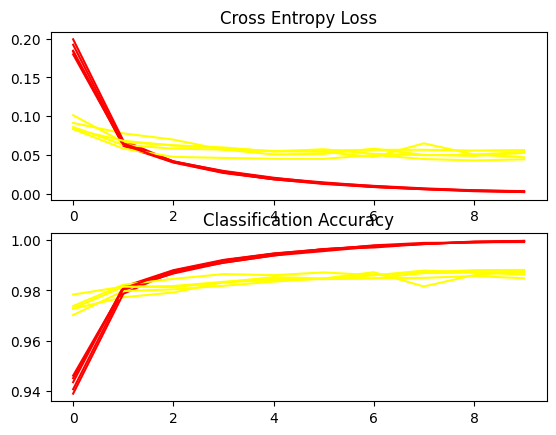

In [90]:
for i in range(len(histories)):
		plt.subplot(2, 1, 1)
		plt.title('Cross Entropy Loss')
		plt.plot(histories[i].history['loss'], color='red', label='train')
		plt.plot(histories[i].history['val_loss'], color='yellow', label='test')
		plt.subplot(2, 1, 2)
		plt.title('Classification Accuracy')
		plt.plot(histories[i].history['accuracy'], color='red', label='train')
		plt.plot(histories[i].history['val_accuracy'], color='yellow', label='test')
plt.show()

In [91]:
#Improving the model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	opt = SGD(learning_rate=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

In [92]:
scores, histories = list(), list()
for train_ix, test_ix in kfold.split(X_train):
		model = define_model()
		trainX, trainY, testX, testY = X_train[train_ix], Y_train[train_ix], X_train[test_ix], Y_train[test_ix]
		history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
		_, acc = model.evaluate(testX, testY, verbose=0)
		print('> %.3f' % (acc * 100.0))
		scores.append(acc)
		histories.append(history)


> 98.983
> 98.958
> 99.108
> 98.908
> 99.000
